
# Project 0 - Pytorch for linear algebra

## Brief
* Due:
  * 09/03/2021 11:59PM

* Hand-in: through [Gradescope](https://www.gradescope.com)
* Required files:
  * `<your_gt_username>.zip` on Gradescope
  * `<yout_gt_username>.pdf` on Gradescope


## Overview

Through the projects of this course we will be working with a similar pipeline for you to program, test and submit your work. The main goal of project 0 is for you to familiarize with this workflow. By the end of this project you should be able to:
* To setup a conda environment (see `README.md`)
* Understand how to start the jupyter notebook (see `README.md`)
* Complete the functions requested from you
* Remember how to work with vector and matrices and basic operations in python and using pytorch
* Test your code using unit tests inside the notebook and standalone with pytest
* Create a submission file for the code
* Use gradescope to submit your work

Through out the project, you will follow this Jupyter notebook, which will guide you through general knownledge, to the code you have to write in the **`proj0_code/student_code.py`** file and test against the unit tests that can be found in **`proj0_unit_tests\test_student_code.py`**.

**Note**: you can run unit tests from this notebook as you go along completing each function. You can also use the ```pytest``` command from the terminal to run all the tests. It is recommended to run all the tests from the terminal before making the final submission



## Introduction to Jupyter Notebook

A jupyter notebook file is structured as executable cells. Each cell can be executed independently by clicking the `Run` cell icon or `Ctrl+Enter`. 

As you go through the notebook, you will encounter **TODO** tasks, which let you know that for the following cell, you will have to complete a specific function. You can find all functions that you have to write in the `proj0_code/student_code.py` file. To test if the function works, you will have to restart the Kernel of the jupyter notebook (Found in Kernel -> Restart) and then reload the page. 

## Imports

**Please pay close attention to the packages, libraries, and methods that we will import into this notebook in the following cell.**

Each of these imports plays a unique and important role throughout this project. If you are confused about where a particular function call can be found, please resort back to this section. More will be explained about these imports throughout this notebook.

In [26]:
import os

import torch
import torchvision.datasets
import torchvision.transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt

import proj0_code.student_code as student_code
import proj0_code.utils as utils

import proj0_unit_tests.test_student_code as test_student_code

In [27]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Section 1: Introduction to Vectors and Matrices

Here we will go over the basics of vectors and matrices, how are they defined in Pytorch, and what operation we can apply to them.

### Section 1.a: Defining vectors and Matrices

In general, we will use Pytorch throughout this course, which use [Tensors](https://mathworld.wolfram.com/Tensor.html) to define elements. They are defined as a multi-dimensional matrix containing elements of a single data type. 


For example, if we want to create a row vector $v_1 = [1, 2, -3]$ we can 

In [28]:
v1 = torch.tensor([1., 2., -3.])
print("v1: ", v1)
print("v1 size: ", v1.size())
print("v1 type: ", v1.type())

v1:  tensor([ 1.,  2., -3.])
v1 size:  torch.Size([3])
v1 type:  torch.FloatTensor


Note that the size is $[3]$, which means that the defined tensor is a 1-dimensional ***row-vector***, and defined as a Float Tensor.

We can also create a column vector $v_2 = [2, 4, 6]^T$ as

In [29]:
v2 = torch.tensor([[2.], [4.], [6.]])
print("v2: ", v2)
print("v2 size: ", v2.size())
print("v2 type: ", v2.type())

v2:  tensor([[2.],
        [4.],
        [6.]])
v2 size:  torch.Size([3, 1])
v2 type:  torch.FloatTensor


Note that $v_2$ is a vector with dimensions $3\times1$, which means that the defined tensor is a 1-dimensional ***column-vector***, and defined as a Float Tensor.

Similarly, we can create a matrix $M_1$ as defined as: $$M_1 = \begin{bmatrix}1&2&3\\-1&-2&0\end{bmatrix}$$

In [30]:
M1 = torch.tensor([[1., 2., 3.], [-1, -2, 0]])
print("M1: ", M1)
print("M1 size: ", M1.size())
print("M1 type: ", M1.type())

M1:  tensor([[ 1.,  2.,  3.],
        [-1., -2.,  0.]])
M1 size:  torch.Size([2, 3])
M1 type:  torch.FloatTensor


Notice that matrix $M_1$ has dimensions $2 \times 3$.

### Section 1.b Scalar Multiplications

Now that we have vectors $v_1$ and $v_2$ and matrix $M_1$, we can make some operations onto them. 

For instance, we can multiply them by a scalar. Let's try calculating: $$2 \cdot v_1$$$$0.3 \cdot M_1$$

In [32]:
print(v1*2)
print(M1*0.3)

tensor([ 2.,  4., -6.])
tensor([[ 0.3000,  0.6000,  0.9000],
        [-0.3000, -0.6000,  0.0000]])


### Section 1.c Tensor Multiplication

We can also multiply a matrix by a vector. Always considering that the matrix and vector dimensions are consistent. We can do $M_1 \cdot v_2$ by using `torch.mm` (matrix multiplication). 

With matrix multiplication, we take a tensor of dimension $m \times p$, multiply it with a tensor of dimension $p \times n$, and will get a tensor with dimension $m \times n$.

If we calculate $M_1 \cdot v_2$, we are multiplying a $2\times3$ tensor with a $3\times1$ tensor. Thus, the resulting tensor will be a tensor of dimension $2\times1$.

In [33]:
print(M1.mm(v2))
print(M1.mm(v2).size())

tensor([[ 28.],
        [-10.]])
torch.Size([2, 1])


Now, try to multiply $M_1$ with $v_1$. We should get an `RuntimeError` due to dimensions mismatch because $v_1$ is not the proper size for matrix multiplication.

*To attempt this, uncomment out the line in the cell below before you run it. After you see the error, be sure to comment the line back out again by placing a `#` in front before you proceed so it doesn't affect the grader.*

In [14]:
# print(M1.mm(v1))

An error is expected because, here, we are attempting to multiply a $2\times 3$ tensor with a tensor of size $3$. 

For this matrix multiplication to work out successfully, $v_1$ will have to be of size $3\times 1$.

But we also can use the normal multiplication $*$ which will execute a elementwise multiplication. As before, if we do $M_1*2$, it multiplies each element by the constant. However, if we do $M_1*v_1$, it will multiply each element of the matrix by the correspondant element of the vector.

In [34]:
print("M1 =", M1)
print("v1 =", v1)
print("M1*v1 =", M1*v1)

M1 = tensor([[ 1.,  2.,  3.],
        [-1., -2.,  0.]])
v1 = tensor([ 1.,  2., -3.])
M1*v1 = tensor([[ 1.,  4., -9.],
        [-1., -4., -0.]])


We encourage you to see how you can perform different use of the multiplication $*,$ using a matrix and a column vector or another matrix.

You can also return a specific element of the tensor. Keep in mind that the first element of the tensor is in the 0th position, the second element of the tensor is in the 1st position, the third element of the tensor is in the 2nd position, and so on.

Recall the matrix $M_1$ which has $2$ rows and $3$ columns. If we want the singular element from the second row and third column, we want the element at matrix position $[1,2]$.

In [35]:
print("M1: ", M1)
print("Element in 2nd row and 3rd column: ", M1[1,2])

M1:  tensor([[ 1.,  2.,  3.],
        [-1., -2.,  0.]])
Element in 2nd row and 3rd column:  tensor(0.)


### Section 1.c Transpose Operation

The first code that you will have to implement is to **transpose** a row-vector, into a column-vector.

**TODO: Write the function ```vector_transpose(v)``` found in `proj0_code/student_code.py`. Save `proj0_code/student_code.py`, and return to this jupyter notebook to run the following cell.**

In [41]:
v_t = student_code.vector_transpose(v1)

print("v1: ", v1)
print("v1 size: ", v1.size())
print("v_t: ", v_t)
print("v_t size: ", v_t.size())

v3 = torch.rand(10) * 5
v_t = student_code.vector_transpose(v3)

print("v3: ", v3)
print("v3 size: ", v3.size())
print("v_t: ", v_t)
print("v_t size: ", v_t.size())


v1:  tensor([ 1.,  2., -3.])
v1 size:  torch.Size([3])
v_t:  tensor([[ 1.],
        [ 2.],
        [-3.]])
v_t size:  torch.Size([3, 1])
v3:  tensor([4.2172, 1.4918, 4.4047, 4.4727, 4.9077, 0.0250, 0.4656, 1.3497, 2.2142,
        1.1108])
v3 size:  torch.Size([10])
v_t:  tensor([[4.2172],
        [1.4918],
        [4.4047],
        [4.4727],
        [4.9077],
        [0.0250],
        [0.4656],
        [1.3497],
        [2.2142],
        [1.1108]])
v_t size:  torch.Size([10, 1])


Does the print output look correct? 

We encouraged you to try some more manual inputs and check the results.

### Unit Tests
In this course, we will heavily rely on unit-testing to help students be confident with their submissions, and to help TAs in grading. For all projects, we will supply some unit-tests to the students, and some unit-tests will be held-back and executed on gradescope. All public unit-tests for this project can be found in `proj0_unit_tests/test_student_code.py`.

In the next cell, we will run the unit-test for the ```vector_transpose``` function. If the test is successful, proceed to the further sections. Otherwise, take another look at your implementation and try to fix it so it passes the test successfully.

In [40]:
print("test_vector_transpose(): " + test_student_code.verify(test_student_code.test_vector_transpose))

test_vector_transpose(): "Correct"


### Section 1.d Matrix Inverse

As a final element, we will look at the **inverse** of a matrix. 

We will define a square matrix $A$ which is non-singular (all the columns are linearly independent).

The inverse of $A$, commonly written as $A^{-1}$, is a square matrix such that $A \cdot A^{-1}$ is the identity matrix, $I$.

In [57]:
A = torch.tensor([[1., 2., 1.],[1., 2., 0.], [-1., 2., 0.]])
print('A =', A)

A_inv = torch.inverse(A)
print('A^-1 = ', A_inv)

A = tensor([[ 1.,  2.,  1.],
        [ 1.,  2.,  0.],
        [-1.,  2.,  0.]])
A^-1 =  tensor([[ 0.0000,  0.5000, -0.5000],
        [ 0.0000,  0.2500,  0.2500],
        [ 1.0000, -1.0000,  0.0000]])


In [58]:
print('Multiplication of a matrix with its inverse: ')
print(A.mm(A_inv))

Multiplication of a matrix with its inverse: 
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


## Section 2: Working with images

In the following section, we will start working with images, learning how to manipulate them and perform basic image operations. 

First, we will load a set of images that can be found in the `proj0_code/imgs` folder. For this project, we will work on a Mount Rushmore image. 

Note: An image is a matrix of size $(M\times N\times 3)$. These dimensions correspond to the images width in pixels, height in pixels, and 3 layers corresponding to the red, green and blue values, respectively.

For simple data retrieval, we will create a `list` of images using the images in the `proj0_code/imgs` folder.

In [59]:
images = [] # instantiating our list 
images.append(utils.load_image(os.path.join('imgs', 'fish.jpeg'))) # complete image containing red, green, and blu components
images.append(utils.load_image(os.path.join('imgs', 'fish_R.png'))) # only red component of image
images.append(utils.load_image(os.path.join('imgs', 'fish_G.png'))) # only green component of image
images.append(utils.load_image(os.path.join('imgs', 'fish_B.png'))) # only blue component of image

We can verify that we have indeed created a list of by print the type of `images`.

In [54]:
print(type(images))

<class 'list'>


In this case, we have 4 images. Look closely over the next cell to understand how we get an image's type, size, and display the image using `matplotlib.pyplot`.

In [13]:
print("Type for the list's first image element: ", type(images[0]))
print("Size of the first image in list: ", images[0].size())
print("The first image in list: ")

fig = plt.imshow(images[0])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

NameError: name 'images' is not defined

Notice that the image has a size of $[591, 910, 3]$.

This means that the size of each layer in the image has a size of $[591, 910]$. 

To access these layers individually, we can call `im[:,:,#]` where `#` is 0, 1, or 2, corresponding to the red, green, and blue layers, respectively.

Size of first (red) layer in image:  torch.Size([591, 910])
Red component of image: 


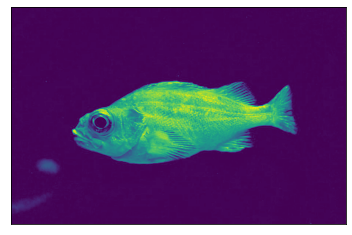

In [73]:
im = images[0]
print("Size of first (red) layer in image: ", im[:,:,0].size())

print("Red component of image: ")
fig = plt.imshow(im[:,:,0])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

Contrary to popular belief, the red component of the image does not appear in red when displayed separately from the other component. Such can be said for the blue and green components when displayed individually as well.

Size of second (green) layer in image:  torch.Size([591, 910])
Green component of image: 


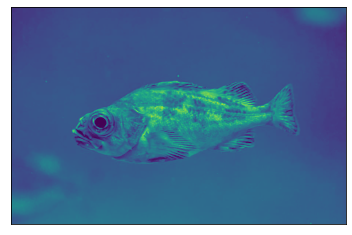

In [74]:
print("Size of second (green) layer in image: ", im[:,:,1].size())

print("Green component of image: ")
fig = plt.imshow(im[:,:,1])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

Size of third (blue) layer in image:  torch.Size([591, 910])
Blue component of image: 


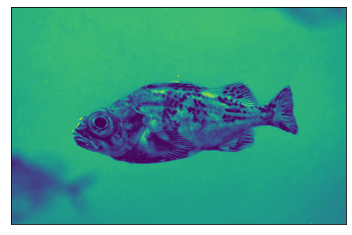

In [75]:
print("Size of third (blue) layer in image: ", im[:,:,2].size())

print("Blue component of image: ")
fig = plt.imshow(im[:,:,2])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### Section 2.a Cropping Images

We can also crop the image using a special indexing (also known as **slicing**) of the rows and columns. Please play around with the numerical values in the following cell to better understand the various ways you can crop an image.

Size of cropped image:  torch.Size([230, 630, 3])
Cropped Image: 


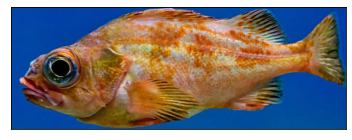

In [118]:
cropped_image = im[200:430, 150:780, :]

print("Size of cropped image: ", cropped_image.size())

print("Cropped Image: ")
fig = plt.imshow(cropped_image)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### Section 2b: Stacking gray images to form color images

The images at index 1, 2 and 3 in the `images` list are grey-scale images of the R, G, and B channels of the original image. 

They are each $M \times N \times 3$ in size. However, for each image, the 3 layers that make up that image have the same values (and hence they are grey-scale). Thus, we want to take one layer from each image and create a new image $M \times N \times 3$.

We are going to show that if you stack the one layer from each of these grey-scales images, you will get a $M \times N \times 3$ image that looks identical to the original 3-layers colored image.

**TODO: Write the function ```stack_images()``` found in `proj0_code/student_code.py`. Once you have written the function, save `proj0_code/student_code.py` and return to this jupyter notebook to run the following cell.**

test_stack_images(): "Correct"


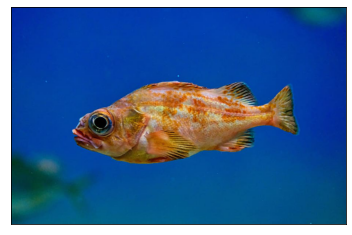

In [127]:
D = student_code.stack_images(images[1][:,:,0], images[2][:,:,0], images[3][:,:,0])

fig = plt.imshow(D)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

print("test_stack_images(): " + test_student_code.verify(test_student_code.test_stack_images))

### Section 2c: Concatenation of images

Now that we have a colored image, we want to create a 2x2 block from the same image by repeatedly concatenating the image like this:

<img src="imgs/4fish.png" width="300">

**TODO: Write the function ```concat_images()``` found in `proj0_code/student_code.py`. Once you have written the function, save `proj0_code/student_code.py` and return to this jupyter notebook to run the following cell.**

test_concat_images(): "Correct"


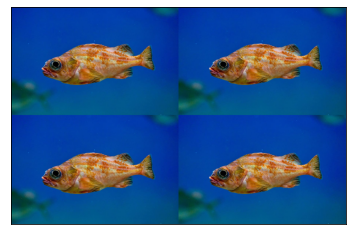

In [105]:
D1 = student_code.concat_images(D)

fig = plt.imshow(D1)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

print("test_concat_images(): " + test_student_code.verify(test_student_code.test_concat_images))

# Section 3: Point Operations

For the final part, we will introduce **masks**. When working on an image, we would like to perform some operation over certain pixel of the image. 

For example, we would like to remove the water in the image. Thus, we need to identify which pixels are part of the water.

We can create a matrix of equal size as the image $M \times N$ and assign a 1 or a 0 depending on a certain condition, resulting in a binary matrix of 1s and 0s is called a **mask**. 

**TODO: Write the function ```create_mask(X, val)``` found in `proj0_code/student_code.py` which takes a single layer of an image and a threshold value `val` and creates a mask of the values that are less than or equal to `val`. Once you have written the function, save `proj0_code/student_code.py` and return to this jupyter notebook to run the following cell.**

test_create_mask(): "Correct"


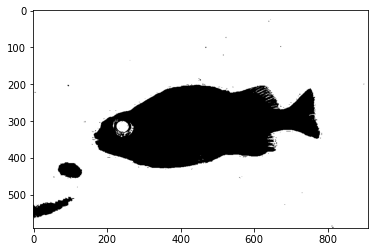

In [107]:
mask = student_code.create_mask(images[0][:,:,0], 0.04)

plt.imshow(student_code.stack_images(mask,mask,mask)*255)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

print("test_create_mask(): " + test_student_code.verify(test_student_code.test_create_mask))

We are doing a simple threshold, which find most of the pixels that belong to the water; but, it also finds some pixel around the image. For this project we won't mind about those pixels.

Once we have the mask, we can use it to modify the respective pixel of the original image. For example, we can increase the values for the water pixels in the image. 

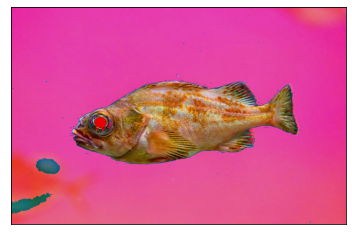

In [109]:
D2 = D.clone() # makes copy of image
D2[:,:,0] = D2[:,:,0] + mask.type(torch.FloatTensor)*0.9

fig = plt.imshow(D2)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# Code Testing

Congrats, you have completed all the portions of this starter project. It is recommended to run all the unit tests using ```pytest``` command from the terminal before. To do this: 

* open the terminal and go to the directory `../proj0_code/`
* activate your `proj0` environment
* run the command `pytest proj0_unit_tests/`
* On the terminal, you should see a green dot (.) for each unit test passed and an error message for each unit test failed. Or, you could see the number of tests you have passed, the number or warnings you have, and/or the number of tests you have failed. If you pass all of the tests, it won't show any failures. That is what you want! Showing a few warnings is fine so long as all of the tests are passed. If you fail some of the tests, please return back to the functions associated with the failed tests and fix them so that they pass the test.


# Writeup

For this project (and all other projects), you must do a project report using the template slides provided to you at `proj0_template.pptx`. Do <u>not</u> change the order of the slides or remove any slides, as this will affect the grading process on Gradescope and you will be deducted points. You must convert the slide deck into a PDF with the name `<your_gt_username.pdf>` for your submission.

# Rubric

* +20 pts: Code
* +10 pts: PDF report
* -2\*n pts: Lose 2 points for every time you do not follow the instructions for the hand-in format.


# Submission

This is very important as you will lose 2 points for every time you do not follow the instructions. 

Create the zip file using `python zip_submission.py --gt_username <your_gt_username>` (it will zip up the appropriate directories/files for you!). You will have two submission files for this project:

1. `<your_gt_username>.zip` via **Gradescope** to 'assigment Project 0 - Code'
2. `<your_gt_username>.pdf` via **Gradescope** to 'assignment Project 0 - Report'

Do <u>not</u> install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that's not in there by default will probably cause your code to break during grading. Do <u>not</u> use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. 

# Credit
Assignment developed by Heyley Gatewood, Sergio Aguilera, Arvind Krishnakumar, Ayush Baid, Sen Wang and Frank Dellaert.